## Is Netflix Adding More TV Content ? 

Netflix has been producing content in both films and TV genres ever since the internet ubiquity made it easy to watch content online. But to provide users with a wide variety of options and an enjoyable experience, it made sense to include titles from Films and TV studios. A Flixable study found that Netflix had been reducing online movie content and has moved on to experiment and include more TV series. 

Using the dataset that has been made available courtesy of ShivamB, we would try to find out if that specific information holds true. The dataset also makes it possible to answer questions such as:

* What is the percentage of Films vs TV series available on NetFlix
* What target audience is NetFlix more interested in Capturing
* What are the genres between Films and TV series that are being produced more by NetFlix
* And Is Netflix really adding more TV series content over the recent years


## Importing Libraries and Data 

In [1]:
''' 
Importing Libraries that would be useful in aiding analysis and visualization. Those who are 
looking to view all the visualizations would have to install plotly packages as they don't come 
pre-installed. The instructions to download this package can be found 
here https://pypi.org/project/plotly/
'''
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns
from pandas_profiling import ProfileReport

## Loading Dataset

In [2]:
'''Importing the dataset and creating a Dataframe using Pandas Package'''

df_original = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

## Data Understanding

In [3]:
df_original.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In order to understand data, we'd have to find out what is the structure of dataframe. i.e how many 
columns and rows of data are there. Moreover, how many categories of data are either numerical or 
categorical and where the missing values in dataset are. 

In [4]:
'''The distribution of the data types in dataframe can be found using dtypes command'''
df_original.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
'''Size of the Dataframe can be found using '''
df_original.shape

(7787, 12)

In [6]:
'''In order to find the missing values in the dataset, we can use the following command'''
df_original.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

###### Creating another copy of the dataset in Case We need access to unmodified data

In [7]:
df1 = df_original

## Cleansing the Data & Data Wrangling

In [8]:
'''Removing the missing values that are availble in dataset one by one'''

#removing the rows that have missing date_added_values

df_original = df_original[df_original['date_added'].notna()]

#removing the rows that have missing director values

df_original = df_original[df_original['director'].notna()]

#removing the rows that have missing cast Values

df_original = df_original[df_original['cast'].notna()]

#removing the rows that have missing country values

df_original = df_original[df_original['country'].notna()]

#Size of the dataset after removing most of the missing values

df_original.shape

(4812, 12)

### A Word About Missing Values In This Dataset

In this dataset since we are confined to the exploratory analysis of Netflix, presence of missing values does not affect our analysis. Generally, missing values need to be replaced appropriately when we are concerned with the predictive analysis on a subsequent dataset. 

There are columns in the dataset such as that of director, where the replacement of missing values will not make any sense. For example, if a director entry is missing against a film, replacing it with the most frequently occuring value (mode replacement) will bias the dataset towards the name of the director appearing most frequently. This would skew our exploratory analysis and would present, at best, a skewed conclusion.

Moreover, since removing all the values reduces our dataset entries to a considerable extent, i.e from almost 8000 entries to less than 5000, we are going to keep them

### Preparing the Dataset For Subsequent Analysis

In the dataset provided, there are two types of dates available. One of the dates represents the **release dates** indicating the dates when the film or TV series was *actually released*. The other date column i.e. that of the 'date_added' indicates the actual date when the specific film or TV series **was added in Netflix catalogue**. 

This is important to note because there have been several movies and TV series in Netflix catalogue which could have been released even before Netflix started its own business of online streaming but to provide its subscribers with the diversity of content, Netflix added them to the catalogue . 

In order to aid our analysis of finding out the answer to our question whether more TV content is being added, we'd use the 'date-added' column to avoid confusion between the content that had been released before 2010 etc.

### Extracting Required Information From Date_added Column

In [9]:
'''since the date_added column is an object, we need to convert its type to datetime 
to extract the information'''

df1['date_added'] = pd.to_datetime(df1['date_added'])

In [10]:
'''
Extracting the Year information 

'''

df1['year_added'] = pd.DatetimeIndex(df1['date_added']).year
df1['year_added'].head()

0    2020.0
1    2016.0
2    2018.0
3    2017.0
4    2020.0
Name: year_added, dtype: float64

In [11]:
'''
Extracting the month information from date_added column
'''
df1['month_added'] = pd.DatetimeIndex(df1['date_added']).month
df1['month_added'].head()

0     8.0
1    12.0
2    12.0
3    11.0
4     1.0
Name: month_added, dtype: float64

In [12]:
'''
Preparing Data for Visualizing the Distribution of Content

'''

df1['Count']=1
df_titles=df1.groupby('type')['Count'].sum().reset_index()

## Exploratory Data Analysis

Now that we have got the required dataset necessary for our analysis, let's plot viusualizations and explain outcomes

### Overall Distribution of Content : Percentage of Films vs TVs

In [13]:
fig1=px.pie(df_titles,values='Count',names='type',hole=0.4)
fig1.update_layout(title='Type of Title',title_x=0.5)
fig1.update_traces(textfont_size=15,textinfo='percent+label')
fig1.show()

****Findings****: This visualization shows that Netflix still hosts a larger content of films against movies. However, we have no information available, when specific titles were added or what specific categories could have been abandoned. Therefore we need to look a little deeper

### Specific Target Audience for the Content 

Before we'd go and do a timeline analysis, it would be interesting to see what demographic is Netflix targeting. Finding out the answer to this could help us understand why certain specific categories of content are being added more often than others

In [14]:
'''Preparing a new dataframe so that the number of titles against specific content rating 
could be counted. We are taking two columns from the our dataframe df1 and taking out release 
year and rating columns so that number of entries against those columns can be counted'''
def rating_col(df):
    t_df1 = df1[[ 'release_year', 'rating']]
    t_df1 = t_df1.value_counts().to_frame()
    t_df1.reset_index(level =  [0,1], inplace = True)
    t_df1 = t_df1.rename(columns = {0:'count'})
    rating = pd.DataFrame([],columns = ('release_year', 'rating', 'count'))
    for rating_element in df1['rating'].unique():
        rating = pd.concat([rating, t_df1[t_df1['rating'] == rating_element].iloc[:1,:]])
    return rating

df_r = rating_col(df_original)
df_r

,release_year,rating,count
0,2018,TV-MA,544
17,2016,R,80
47,2016,PG-13,31
5,2018,TV-14,263
12,2017,TV-PG,111
69,2016,NR,20
37,2020,TV-G,39
23,2020,TV-Y,67
38,2020,TV-Y7,39
48,2018,PG,30


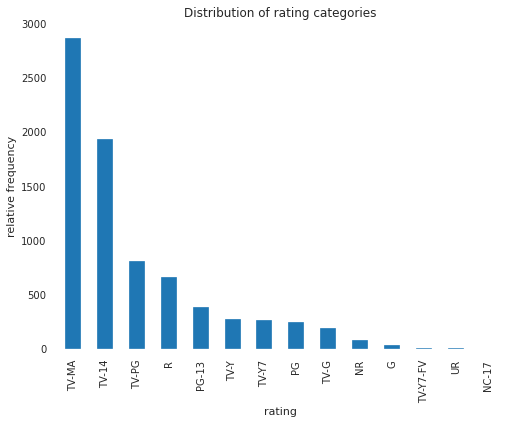

In [15]:
plt.figure(figsize=(8,6))
df1['rating'].value_counts().plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

**Findings**: The above graph shows that netflix has been adding more Films and TV series content across its mature audience. The content production in mature ratings dwarfs content production in other ratings. Morevoer, there is also an emphasis on capturing the attention of teen-adults as is indicated by the second bar graph. 

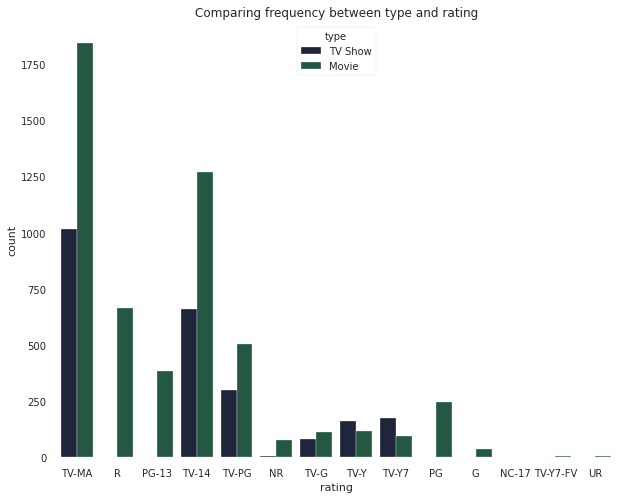

In [16]:
plt.figure(figsize=(10,8))
#sns.color_palette("mako", as_cmap=True)
cpal = sns.color_palette("cubehelix")
sns.countplot(x='rating',hue='type',data=df1, palette = cpal)
plt.title('Comparing frequency between type and rating')
plt.show()

**Findings**: The results of this graph echo the previous chart where more films and tv series content is distributed across mature audience

### Content Production Countries

Finding out the content production geography is another metric that would help us understand the 
relationship between content production and the specific content being consumed

In [17]:
country_df = df1['country']
country_df = df1['country'].fillna(df1['country'].mode().iloc[0], inplace = True)

Since there are entries at end of countries such as united states, we need them separated. Hence in order to achieve that, we'd have to use the following code

In [18]:
from collections import Counter

inter_df = df1[df1['country'].notna()]
inter_df = df1[df1['country'].notnull()]
country_df = inter_df['country']
#country_df = country_df[country_df['country'].notna()]
country_counting = pd.Series(dict(Counter(','.join(country_df).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
#country_counting.drop(['NULL'], axis=0, inplace=True)

In [19]:
top15_country = country_counting[:15]
top15_country

United States     3804
India              990
United Kingdom     723
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
China              147
Australia          144
Egypt              110
Turkey             108
Hong Kong          102
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Top 15 Content Production Countries')

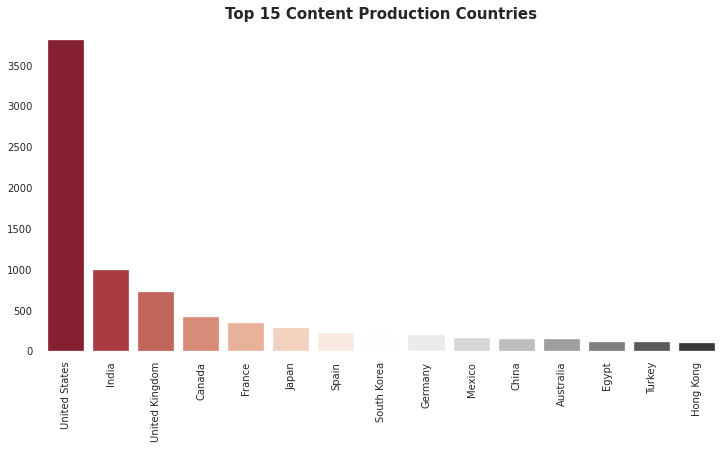

In [20]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top15_country.index, top15_country, ax=ax, palette="RdGy")
ax.set_xticklabels(top15_country.index, rotation='90')
ax.set_title('Top 15 Content Production Countries', fontsize=15, fontweight='bold')

**Findings**: The content produced acorss united states happens to supply most of Netflix catalogue. This would indicate whatever changes would happen to come about in US, would end up affecting the consumption habits of Netflix subscribers around the world

### Has Netflix been adding more TV content?

Now to come to our question wehther Netflix had been adding more TV content, we'd want to do a 
time analysis. This would help us find whether TV content has been on the rise or not. Specifically, 
we have chosen to use plotly package in this graph to observe at each point in time the 
speific production of TV content against those of films

In [21]:
'''Re-arranging data for use in plotly package. Moreover, the data for TV series and films
is separated and stored into two different columns so that the time distribution for each 
content can be studied separately

    *inputs: 
        dataframe df;
    *returns: 
        dataframes with tv and films content separated, df_tv, df_mov respectively;
    
    '''

def added_year_df(df):
    
    df['Count']=1
    #df_year_add=df.groupby('year_added')['Count'].sum().reset_index()
    #df_year_add

    df_tv_cont=df[df['type']=='TV Show']
    df_mov_cont=df[df['type']=='Movie']

    df_tv_cont_years=df_tv_cont.groupby('year_added')['Count'].sum().reset_index()
    df_mov_cont_years=df_mov_cont.groupby('year_added')['Count'].sum().reset_index()
    df_tv = df_tv_cont_years
    df_mov = df_mov_cont_years
    
    return df_tv, df_mov


In [22]:
#preparing dataset as required for the plotly package

df_tv, df_mov = added_year_df(df1)

#And another assignment to get number of counts
df1_year_add=df1.groupby('year_added')['Count'].sum().reset_index()

fig5=px.line(df1_year_add ,x='year_added',y='Count',labels={'year_added':'Year of Content Inclusion','Count':'Amount of content released'})
fig5.update_traces(name='Total content',showlegend=True)
fig5.add_scatter(name='TV shows',x=df_tv['year_added'], y=df_tv['Count'], mode='lines')
fig5.add_scatter(name='Movies',x=df_mov['year_added'], y=df_mov['Count'], mode='lines')
fig5.update_layout(title='Number of Addition each year',title_x=0.5,template='plotly_white')

**Findings**: The above graph shows that indeed, after 2018, the increase in Netflix content of movies went up from 1255 to 1497 (increase of 20 % ) while those of the TV series went up from 430 to 656 (increase of 56 %). Similarly, in the next year the movies catalogue actually decreased whereas those of the TV series kept rising up. This indicates that Netflix did start paying more attention to TV series than just its films content.

### Testing An Assumption

**Assumption**: Since netflix has a variety of content available in its movie and film catalogue, the
release_year field should not actually be able to give us an accurate information about the addition
of specific films and TV series in specific years. This is because, there could be a lot of films
and TV series which might have been released in year 2011 but were actually added into netflix
content in 2018 or maybe 2019. Hence release_year should not be able to provide us with accurate
information

In [23]:
'''Re-arranging data for use in plotly package. Moreover, the data for TV series and films
is separated and stored into two different columns so that the time distribution for each 
content can be studied separately

    *inputs: 
        dataframe df;
    *returns: 
        dataframes with tv and films content separated, df_tv, df_mov respectively;
    
    '''
def release_year_df(df):
    df['Count']=1
    #df_year_add=df.groupby('release_year')['Count'].sum().reset_index()
    #df_year_add
    df_tv_cont=df[df['type']=='TV Show']
    df_mov_cont=df[df['type']=='Movie']

    df_tv_cont_years=df_tv_cont.groupby('release_year')['Count'].sum().reset_index()
    df_mov_cont_years=df_mov_cont.groupby('release_year')['Count'].sum().reset_index()
    
    df_tv = df_tv_cont_years
    df_mov = df_mov_cont_years

    return df_tv, df_mov 



In [24]:
df_tv, df_mov = release_year_df(df1)
df_year_release =df1.groupby('release_year')['Count'].sum().reset_index()

fig6=px.line(df_year_release ,x='release_year',y='Count',labels={'release_year':'Year of release','Count':'Amount of content released'})
fig6.update_traces(name='Total content',showlegend=True)
fig6.add_scatter(name='TV shows',x=df_tv['release_year'], y=df_tv['Count'], mode='lines')
fig6.add_scatter(name='Movies',x=df_mov['release_year'], y=df_mov['Count'], mode='lines')
fig6.update_layout(title='Number of releases each year',title_x=0.5,template='plotly_white')

**Findings**: As predicted, the estimate of TV series and films in with this release-year field presents a distorted picture of entire catalogue. While the addition of TV series is also increasing, by hovering over the TV and Films Catalogue we can see that a lot of the titles in both TV series and Films which had been included during "year_add" column have been discounted. Therefore, "Year_add" column presents a more sound analysis confirming our hypothesis

### Categories of Specific Content Being Produced More

The 'listed_in' categories provides a brief description as well as the genre of the films and 
TV shows. Once we could separate this genre, we'd be able to see what specific genres in both TV series and films are 
getting produced and catalogued more at Netflix. This would help us in narrowing our analysis of
Netflix, on what specific categories could be driving Netflix's strategy towards paying more attention in TV series
versus those of films. Doing a time analysis of this data would help us really dive into a detailed
picture of what content is being produced more at specific intervals of time

In [25]:
'''
Separating and manipulating the data just a bit to be fed into plotly graph package.

    Input:
    
    * dataframe df
    
    Returns:
    
        *labels = storing labels values in a single column
        *values = storing counted values in a single column

'''
def listed_in(df):
    col = "listed_in"
    categories = ", ".join(df['listed_in']).split(", ")
    counter_list = Counter(categories).most_common(20)
    labels = [_[0] for _ in counter_list][::-1]
    values = [_[1] for _ in counter_list][::-1]
    return labels, values


In [26]:
labels, values = listed_in(df1)
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#13ea20"))

data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

**Findings**: The categorical analysis of Films vs TV series indicates that the netflix catalogue in internationl movies, dramas and comedies dwarves its investment in other genres. 

### Most Frequently Represented Categories

Now that we have found out what specific content is being retained and/or produced more in Netflix, we are in a position to further breakdown our analysis and provide a nuanced picture of most frequently preserved categories in Netflix 

In [27]:
'''
creating a dataframe catagory_df1, and t_df to extract categories against release_year from original 
dataframe df1

    *inputs : 
        dataframe df
    *retunrs : 
        a new dataframe with release_year & respective categories df_c
    
'''
def category_df(df):
    t_df = list()
    clean_df1 = df1.dropna()
    clean_df1.reset_index(inplace=True)
    for ind, element in clean_df1.iterrows():
        type_show = element['release_year']
        for cast in str(element['listed_in']).split(','):
            t_df.append([type_show, cast])
    category_df = pd.DataFrame(t_df, columns= ['release_year', 'category'])
    
    df_c = category_df
    
    return df_c

In [32]:
'''
creating a dataframe catagory_df1, and t_df to extract categories against release_year from original 
dataframe df1

    *inputs : 
        dataframe df
        
    *Returns : 
        year_df : df with data across specific years for three columns, years, genre and count
    
'''

def yearly_data(df):
    
    category_df1 = category_df(df)

    category = category_df1.value_counts().to_frame()
    category.reset_index(level=[0,1], inplace=True)
    category = category.rename(columns = {0:'count'})


    years = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]
    year_df1 = list()
    for year in years:
        temp1 = category[category['release_year'] == year].iloc[0,:]
        temp2 = category[category['release_year'] == year].iloc[1,:]
        year_df1.append(list(temp1))
        year_df1.append(list(temp2))
    
    year_df = pd.DataFrame(year_df1, columns=('years', 'genre', 'count'))
    
    return year_df

year_df = yearly_data(df1)

Text(0.5, 1.0, 'Top Two Genre in last 10 years')

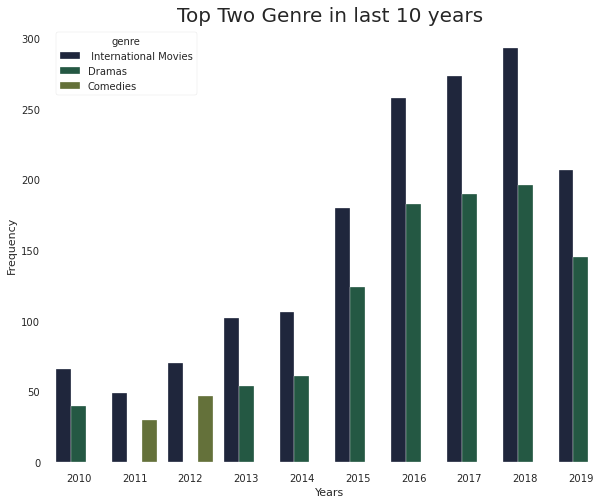

In [33]:
bar, ax = plt.subplots(figsize=(10,8))
cpal = sns.color_palette("cubehelix")
sns.barplot(x = 'years', y ='count', hue='genre', data = year_df, palette = cpal)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Top Two Genre in last 10 years', size=20)

**Findings**: Once again, the time analysis indicates compratively huge investments from Netflix into either retaining and/or producing more TV series, and there's a far significant decrease in Films i.e Genres of International Films than there is in TV series confirming our previous analysis that TV series happens to be the content of choice where Netflix is heavily focued for now  

## Conlcusion

Using the limited dataset that has been made available, we have been able to conclude with a certain degree of confidence that;

* Despite having a larger catalogue of films for now, Netflix's TV content seems to be on an far more significant upwards trajectory than films
* Most of the content being either produced/retained at Netflix is Mature rated and is geared towards capturing the attention of mature audience but Netflix is also aware of the interests of adult teens and is also retaining content for those
* Year on Year analysis indicates rising trend in TV shows retention/production but far less interests in Films
* International Films and TV shows overall dominate the category of most content produced/retained at Netflix